<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Visualization

Elaborado por: NS - Variações dos exercícios propostos na aula.



## Introduction

The aim of these labs is to introduce you to data visualization with Python as concrete and as consistent as possible.
Speaking of consistency, because there is no *best* data visualization library available for Python - up to creating these labs - we have to introduce different libraries and show their benefits when we are discussing new visualization concepts. Doing so, we hope to make students well-rounded with visualization libraries and concepts so that they are able to judge and decide on the best visualization technique and tool for a given problem *and* audience.

Please make sure that you have completed the prerequisites for this course, namely [**Python Basics for Data Science**](https://www.edx.org/course/python-basics-for-data-science-2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) and [**Analyzing Data with Python**](https://www.edx.org/course/data-analysis-with-python?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

**Note**: The majority of the plots and visualizations will be generated using data stored in *pandas* dataframes. Therefore, in this lab, we provide a brief crash course on *pandas*. However, if you are interested in learning more about the *pandas* library, detailed description and explanation of how to use it and how to clean, munge, and process data stored in a *pandas* dataframe are provided in our course [**Analyzing Data with Python**](https://www.edx.org/course/data-analysis-with-python?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

***


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Exploring Datasets with *pandas*](#0)<br>

1.1 [The Dataset: Immigration to Canada from 1980 to 2013](#2)<br>
1.2 [*pandas* Basics](#4) <br>
1.3 [*pandas* Intermediate: Indexing and Selection](#6) <br>
2\. [Visualizing Data using Matplotlib](#8) <br>
2.1 [Matplotlib: Standard Python Visualization Library](#10) <br>
3\. [Line Plots](#12)

</div>


# Exploring Datasets with *pandas* <a id="0"></a>

*pandas* is an essential data analysis toolkit for Python. From their [website](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01):

> *pandas* is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, **real world** data analysis in Python.

The course heavily relies on *pandas* for data wrangling, analysis, and visualization. We encourage you to spend some time and familiarize yourself with the *pandas* API Reference: [http://pandas.pydata.org/pandas-docs/stable/api.html](http://pandas.pydata.org/pandas-docs/stable/api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).


## The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>


Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this lab, we will focus on the Canadian immigration data.

![Data Preview](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%201/images/DataSnapshot.png)

The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01">here</a>.

***


## *pandas* Basics<a id="4"></a>


The first thing we'll do is install **openpyxl** (formerly **xlrd**), a module that *pandas* requires to read Excel files.


In [1]:
!mamba install openpyxl==3.0.9 -y


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['openpyxl==3.0.9']

pkgs/main/noarch         [>                   ] (--:--) No change
pkgs/main/no

Next, we'll do is import two key data analysis modules: *pandas* and *numpy*.


In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Let's download and import our primary Canadian Immigration dataset using *pandas*'s `read_excel()` method.


In [3]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df_can.head(12)
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10) 

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121


In [5]:
df_can.tail(12)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
183,Immigrants,Foreigners,United Kingdom of Great Britain and Northern I...,908,Europe,924,Northern Europe,901,Developed regions,22045,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
184,Immigrants,Foreigners,United Republic of Tanzania,903,Africa,910,Eastern Africa,902,Developing regions,635,...,310,274,291,195,230,136,200,215,224,182
185,Immigrants,Foreigners,United States of America,905,Northern America,905,Northern America,901,Developed regions,9378,...,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501
186,Immigrants,Foreigners,Uruguay,904,Latin America and the Caribbean,931,South America,902,Developing regions,128,...,130,217,175,147,160,99,93,81,47,58
187,Immigrants,Foreigners,Uzbekistan,935,Asia,5500,Central Asia,902,Developing regions,0,...,175,330,262,284,215,288,289,162,235,167
188,Immigrants,Foreigners,Vanuatu,909,Oceania,928,Melanesia,902,Developing regions,0,...,1,1,1,0,0,1,0,0,0,0
189,Immigrants,Foreigners,Venezuela (Bolivarian Republic of),904,Latin America and the Caribbean,931,South America,902,Developing regions,103,...,1224,1211,1192,1335,1239,1353,998,1452,1373,1022
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

This method can be used to get a short summary of the dataframe.


In [6]:
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


To get the list of column headers we can call upon the data frame's `columns` instance variable.


In [7]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

Similarly, to get the list of indices we use the `.index` instance variables.


In [8]:
df_can.index

RangeIndex(start=0, stop=195, step=1)

Note: The default type of intance variables `index` and `columns` are **NOT** `list`.


In [9]:
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


To get the index and columns as lists, we can use the `tolist()` method.


In [10]:
df_can.columns.tolist()

['Type',
 'Coverage',
 'OdName',
 'AREA',
 'AreaName',
 'REG',
 'RegName',
 'DEV',
 'DevName',
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [11]:
df_can.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [12]:
print(type(df_can.columns.tolist()))
print(type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


To view the dimensions of the dataframe, we use the `shape` instance variable of it.


In [13]:
# size of dataframe (rows, columns)
df_can.shape    

(195, 43)

**Note**: The main types stored in *pandas* objects are `float`, `int`, `bool`, `datetime64[ns]`, `datetime64[ns, tz]`, `timedelta[ns]`, `category`, and `object` (string). In addition, these dtypes have item sizes, e.g. `int64` and `int32`.


Let's clean the data set to remove a few unnecessary columns. We can use *pandas* `drop()` method as follows:


In [14]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(10)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,268,295,184,106,76,62,61,39,70,45
6,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,...,14,24,32,15,32,38,27,37,51,25
7,Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,...,1591,1153,847,620,540,467,459,278,263,282
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,147,224,218,198,205,267,252,236,258,207
9,Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,...,930,909,875,1033,1018,1018,933,851,982,1121


Let's rename the columns so that they make sense. We can use `rename()` method by passing in a dictionary of old and new names as follows:


In [15]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:


In [16]:
df_can['Total'] = df_can.sum(axis=1)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


We can check to see how many null objects we have in the dataset as follows:


In [17]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

Finally, let's view a quick summary of each column in our dataframe using the `describe()` method.


In [18]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


***

## *pandas* Intermediate: Indexing and Selection (slicing)<a id="6"></a>


Example: Let's try filtering on the list of countries ('Country').


In [19]:
df_can.Country  # returns a series

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [20]:
df_80s = df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]]
df_80s

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
0,Afghanistan,16,39,39,47,71,340,496,741,828,1076
1,Albania,1,0,0,0,0,0,1,2,2,3
2,Algeria,80,67,71,69,63,44,69,132,242,434
3,American Samoa,0,1,0,0,0,0,0,1,0,1
4,Andorra,0,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004
191,Western Sahara,0,0,0,0,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18,7,12,7,18
193,Zambia,11,17,11,7,16,9,15,23,44,68


In [21]:
df_90s = df_can[['Country', 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]]
df_90s

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,Afghanistan,1028,1378,1170,713,858,1537,2212,2555,1999,2395
1,Albania,3,21,56,96,71,63,113,307,574,1264
2,Algeria,491,872,795,717,595,1106,2054,1842,2292,2389
3,American Samoa,2,0,0,0,0,0,0,0,0,0
4,Andorra,3,0,1,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419
191,Western Sahara,0,1,0,0,0,0,0,0,0,0
192,Yemen,4,18,41,41,39,73,144,121,141,134
193,Zambia,77,69,73,46,51,41,34,72,34,51


In [22]:
df_00s = df_can[['Country', 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]]
df_00s

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746
1,Albania,1816,1602,1021,853,1450,1223,856,702,560,716
2,Algeria,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393
3,American Samoa,0,0,0,0,0,0,1,0,0,0
4,Andorra,0,1,0,2,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171
191,Western Sahara,0,0,0,0,0,0,1,0,0,0
192,Yemen,122,181,171,113,124,161,140,122,133,128
193,Zambia,39,78,50,46,56,91,77,71,64,60


In [23]:
df_10s = df_can[['Country', 2010, 2011, 2012, 2013]]
df_10s

,Country,2010,2011,2012,2013
0,Afghanistan,1758,2203,2635,2004
1,Albania,561,539,620,603
2,Algeria,4752,4325,3774,4331
3,American Samoa,0,0,0,0
4,Andorra,0,0,1,1
...,...,...,...,...,...
190,Viet Nam,1942,1723,1731,2112
191,Western Sahara,0,0,0,0
192,Yemen,211,160,174,217
193,Zambia,102,69,46,59


In [24]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [25]:
df_can.head(10)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,24,32,15,32,38,27,37,51,25,981
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310


In [26]:
# optional: to remove the name of the index
#df_can.index.name = None

In [27]:
df_can.iloc[87]

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [28]:
# 1. the full row data (all columns)
df_can.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.


In [29]:
df_can.columns = list(map(str, df_can.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:


In [30]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [31]:
years_80 = list(map(str, range(1980, 1990)))
years_80

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989']

In [32]:
years_90 = list(map(str, range(1990, 2000)))
years_90

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999']

In [33]:
years_00 = list(map(str, range(2000, 2014)))
years_00

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Filtering based on a criteria

To filter the dataframe based on a condition, we simply pass the condition as a boolean vector.

For example, Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).


In [34]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

In [35]:
# 1. create the condition boolean series
asia = df_can['Continent'] == 'Asia'
print(asia)


Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [36]:
# 2. pass this condition into the dataFrame
df_can[asia]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [37]:
africa = df_can['Continent'] == 'Africa'
print(africa)

Country
Afghanistan       False
Albania           False
Algeria            True
American Samoa    False
Andorra           False
                  ...  
Viet Nam          False
Western Sahara     True
Yemen             False
Zambia             True
Zimbabwe           True
Name: Continent, Length: 195, dtype: bool


In [38]:
df_can[africa]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113
Benin,Africa,Western Africa,Developing regions,2,5,4,3,4,3,6,...,95,116,183,205,238,290,284,391,397,2852
Botswana,Africa,Southern Africa,Developing regions,10,1,3,3,7,4,2,...,7,11,8,28,15,42,53,64,76,396
Burkina Faso,Africa,Western Africa,Developing regions,2,1,3,2,3,2,7,...,91,147,136,139,162,186,144,269,322,2043
Burundi,Africa,Eastern Africa,Developing regions,0,0,0,0,1,2,1,...,626,468,614,448,566,529,604,684,480,8110
Cabo Verde,Africa,Western Africa,Developing regions,1,1,2,0,11,1,9,...,5,7,2,5,1,3,3,6,2,201
Cameroon,Africa,Middle Africa,Developing regions,9,2,16,7,8,13,11,...,604,697,1025,1279,1344,1800,1638,2507,2439,16021
Central African Republic,Africa,Middle Africa,Developing regions,4,3,1,0,0,0,0,...,49,18,30,28,19,26,18,45,169,550


In [39]:
europe = df_can['Continent'] == 'Europe'
print(europe)

Country
Afghanistan       False
Albania            True
Algeria           False
American Samoa    False
Andorra            True
                  ...  
Viet Nam          False
Western Sahara    False
Yemen             False
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [40]:
df_can[europe]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Austria,Europe,Western Europe,Developed regions,234,238,201,117,127,165,196,...,122,102,98,91,109,124,84,102,90,4985
Belarus,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,558,439,568,524,454,438,357,277,247,7975
Belgium,Europe,Western Europe,Developed regions,511,540,519,297,183,181,197,...,400,302,363,335,358,363,332,402,379,10762
Bosnia and Herzegovina,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,...,211,217,209,182,156,168,140,121,119,21855
Bulgaria,Europe,Eastern Europe,Developed regions,24,20,12,33,11,24,33,...,1738,1419,1172,994,784,556,365,451,512,23310
Croatia,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,...,128,102,102,131,92,91,135,112,125,8001
Czech Republic,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,193,146,137,104,159,168,128,173,174,4192


In [41]:
oceania = df_can['Continent'] == 'Oceania'
print(oceania)

Country
Afghanistan       False
Albania           False
Algeria           False
American Samoa     True
Andorra           False
                  ...  
Viet Nam          False
Western Sahara    False
Yemen             False
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [42]:
df_can[oceania]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,356,...,909,875,1033,1018,1018,933,851,982,1121,23829
Fiji,Oceania,Melanesia,Developing regions,632,705,814,554,389,446,361,...,298,277,304,321,311,398,316,270,228,20609
Kiribati,Oceania,Micronesia,Developing regions,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,2,0,15
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
Nauru,Oceania,Micronesia,Developing regions,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,18
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
New Zealand,Oceania,Australia and New Zealand,Developed regions,602,480,364,140,164,148,176,...,370,318,350,480,520,490,375,417,415,10386
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [43]:
latin_caribe = df_can['Continent'] == 'Latin America and the Caribbean'
print(latin_caribe)

Country
Afghanistan       False
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam          False
Western Sahara    False
Yemen             False
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [44]:
df_can[latin_caribe]  

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,24,32,15,32,38,27,37,51,25,981
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Bahamas,Latin America and the Caribbean,Caribbean,Developing regions,26,23,38,12,21,28,23,...,14,18,23,30,27,25,40,60,55,808
Barbados,Latin America and the Caribbean,Caribbean,Developing regions,372,376,299,244,265,285,251,...,111,97,130,134,125,121,97,132,97,6923
Belize,Latin America and the Caribbean,Central America,Developing regions,16,27,13,21,37,26,25,...,37,24,28,48,38,39,36,34,53,1083
Bolivia (Plurinational State of),Latin America and the Caribbean,South America,Developing regions,44,52,42,49,38,44,79,...,134,139,107,143,214,180,86,83,107,3205
Brazil,Latin America and the Caribbean,South America,Developing regions,211,220,192,139,145,130,205,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,Latin America and the Caribbean,South America,Developing regions,1233,1069,1078,781,681,533,633,...,384,427,530,350,375,340,174,291,273,21359
Colombia,Latin America and the Caribbean,South America,Developing regions,266,326,360,244,235,214,257,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


In [45]:
north_america = df_can['Continent'] == 'Northern America'
print(north_america)

Country
Afghanistan       False
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam          False
Western Sahara    False
Yemen             False
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [46]:
df_can[north_america]  

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Canada,Northern America,Northern America,Developed regions,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,20
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122


Before we proceed: let's review the changes we have made to our dataframe.


In [47]:
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


***

# Visualizing Data using Matplotlib<a id="8"></a>


## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).  As mentioned on their website:

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.


### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.


Let's start by importing `matplotlib` and `matplotlib.pyplot` as follows:


In [48]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

\*optional: check if Matplotlib is loaded.


In [49]:
print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0

Matplotlib version:  3.5.0


\*optional: apply a style to Matplotlib.


In [50]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:

*   [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01#plotting)<br>
*   [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01#api-dataframe-plotting)


# Line Pots (Series/Dataframe) <a id="12"></a>


**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.


In [51]:
northern_america =  df_can.loc[north_america, years_80] #[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]
northern_america.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
Country,,,,,,,,,,
Canada,0,0,0,0,0,0,0,0,0,0
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790


In [52]:
northern_america = northern_america.transpose()

<AxesSubplot:>

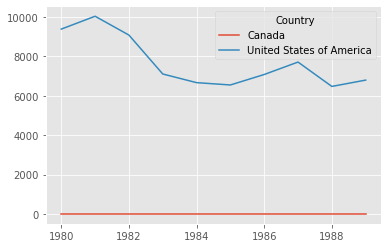

In [53]:
northern_america.plot()
#o dataset é do CANADA, portanto não há imigração do Canada para o Canada.

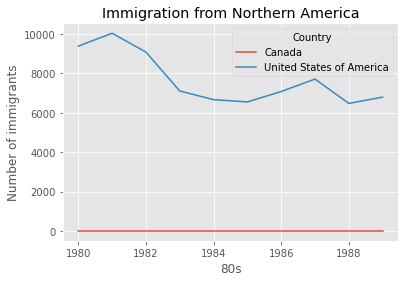

In [54]:
northern_america.index = northern_america.index.map(int) # let's change the index values of Haiti to type integer for plotting
northern_america.plot(kind='line')

plt.title('Immigration from Northern America')
plt.ylabel('Number of immigrants')
plt.xlabel('80s')

plt.show() # need this line to show the updates made to the figure

In [55]:
northern_america2 =  df_can.loc[north_america, years]
northern_america2 = northern_america2.transpose()

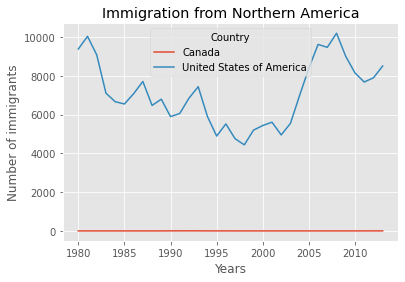

In [56]:
northern_america2.index = northern_america2.index.map(int) # let's change the index values of Haiti to type integer for plotting
northern_america2.plot(kind='line')

plt.title('Immigration from Northern America')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

In [57]:
africa =  df_can.loc[africa, years_90] #[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]
africa.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Country,,,,,,,,,,
Algeria,491,872,795,717,595,1106,2054,1842,2292,2389
Angola,8,23,26,22,8,26,38,27,58,49
Benin,13,13,25,25,18,15,29,32,19,37
Botswana,2,2,4,4,0,2,3,2,0,2
Burkina Faso,4,22,21,19,3,12,16,23,14,20


In [58]:
africa = africa.transpose()

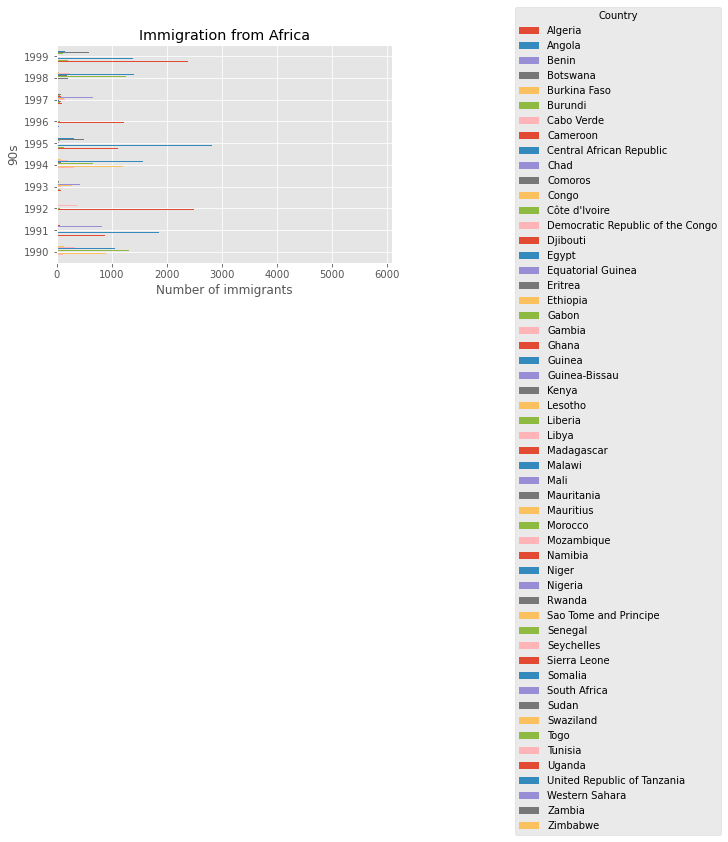

In [59]:
africa.index = africa.index.map(int) # let's change the index values of Haiti to type integer for plotting
africa.plot(kind='barh')

plt.title('Immigration from Africa')
plt.ylabel('90s')
plt.xlabel('Number of immigrants')

plt.legend(title='Country',title_fontsize=10,loc='upper right', bbox_to_anchor=(2, 1.2))

plt.show() # need this line to show the updates made to the figure

In [60]:
oceania =  df_can.loc[oceania, years_00] #[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]
oceania.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,
American Samoa,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Australia,599,799,747,876,930,909,875,1033,1018,1018,933,851,982,1121
Fiji,458,643,611,561,495,298,277,304,321,311,398,316,270,228
Kiribati,1,1,0,0,0,1,0,0,1,1,0,0,2,0
Marshall Islands,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [61]:
oceania = oceania.transpose()

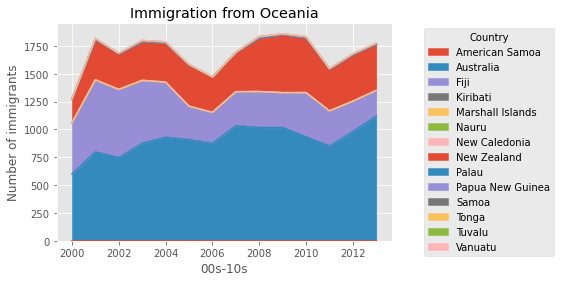

In [62]:
oceania.index = oceania.index.map(int) # let's change the index values of Haiti to type integer for plotting
oceania.plot(kind='area')

plt.title('Immigration from Oceania')
plt.ylabel('Number of immigrants')
plt.xlabel('00s-10s')

plt.legend(title='Country',title_fontsize=10,loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show() # need this line to show the updates made to the figure

In [63]:
latin_caribe =  df_can.loc[latin_caribe, years_90] #[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]
latin_caribe.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Country,,,,,,,,,,
Antigua and Barbuda,31,59,61,44,18,23,21,27,19,12
Argentina,678,763,1023,1022,366,380,396,391,349,318
Bahamas,18,29,16,20,21,17,30,17,14,13
Barbados,327,373,336,380,179,211,176,153,139,114
Belize,38,41,27,37,41,43,27,33,20,37


In [64]:
latin_caribe = latin_caribe.transpose()

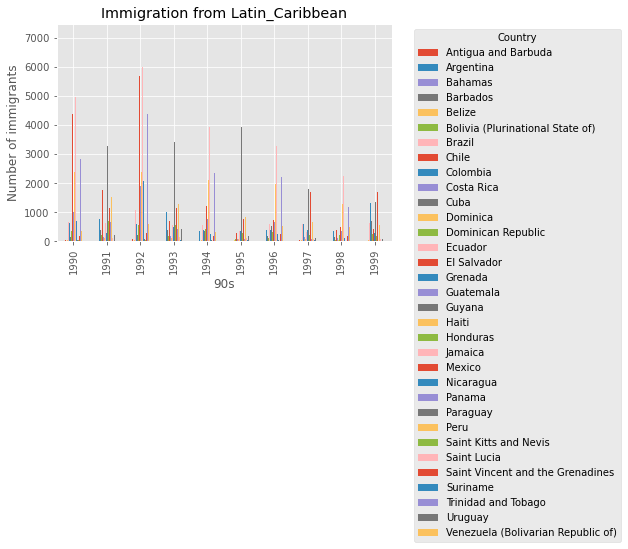

In [68]:
latin_caribe.index = latin_caribe.index.map(int) # let's change the index values of Haiti to type integer for plotting
latin_caribe.plot(kind='bar')

plt.title('Immigration from Latin_Caribbean')
plt.ylabel('Number of immigrants')
plt.xlabel('90s')

plt.legend(title='Country',title_fontsize=10,loc='upper right', bbox_to_anchor=(1.7, 1))

plt.show() # need this line to show the updates made to the figure

### Other Plots

Congratulations! you have learned how to wrangle data with python and create a line plot with Matplotlib. There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing `kind` keyword to `plot()`. The full list of available plots are as follows:

*   `bar` for vertical bar plots
*   `barh` for horizontal bar plots
*   `hist` for histogram
*   `box` for boxplot
*   `kde` or `density` for density plots
*   `area` for area plots
*   `pie` for pie plots
*   `scatter` for scatter plots
*   `hexbin` for hexbin plot


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01" target="_blank">Alex Aklson</a>

### Other Contributors

[Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Weiqing Wang](https://www.linkedin.com/in/weiqing-wang-641640133/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
